In [2]:
# library imports
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt

In [3]:
### merged data
train_df = pd.read_csv("../merged_data/train_part_impute.csv")
test_df = pd.read_csv("../merged_data/test_part_impute.csv")

# Importing classifiers

Here we are testing 13 different classification algorithms. Algorithms were chosen so that they would all be different and work on classification task. 

Insipiration from here: https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods and here https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:
names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LDA",
    "Logistic Regression",
    "XGBoost",
    "SGD",
    "Gradient Boosting Classifier"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(), # kernel = "rbf" by default
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier()
]

# Iterate over classifiers

In [6]:
# supress warnings - as we use deault values, some classifiers give warnings. Mainly logistic regression and Linear Discriminant analysis.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

We use compliance_2020 for algorithm evaluation because test data does not have prediction value for compliance_2021.

In [18]:
 train_df.iloc[:,:28]

,station_id,Ammonium,Coli-like-bacteria,Colony-count-at-22-C,Color-Pt/Co-scale,Electrical-conductivity,Escherichia-coli,Iron,Manganese,Odour-dilution-level,Taste-dilution-degree,Turbidity-NTU,pH,compliance
0,165,0.080000,0.0,4.0,7.0,1167.0,0.0,52.9,30.0,1.000000,1.000000,1.52,7.84,1
1,169,0.290000,0.0,11.0,2.0,536.0,0.0,55.0,20.0,1.666667,1.666667,0.30,8.10,0
2,170,0.250000,0.0,17.0,8.8,631.0,0.0,34.0,10.0,5.000000,5.000000,0.62,7.74,0
3,172,0.180000,0.0,70.0,17.0,953.0,0.0,200.0,22.0,1.000000,1.000000,2.10,8.05,0
4,173,0.090000,0.0,0.0,0.0,434.0,0.0,99.0,10.0,1.000000,1.000000,1.60,7.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,2208,0.050000,0.0,194.0,2.0,538.0,0.0,71.0,57.4,2.000000,2.000000,2.40,7.90,1
876,2209,0.076667,0.0,300.0,4.0,821.0,0.0,100.0,20.0,1.333333,1.333333,0.50,6.99,0
877,2301,0.050000,0.0,32.0,4.0,650.0,0.0,99.0,5.0,2.000000,2.000000,1.00,8.00,0
878,2302,0.130000,0.0,34.0,6.0,423.0,0.0,150.0,19.4,1.000000,1.000000,1.00,8.00,1


In [22]:
X_test = test_df.iloc[:,:13]
y_test = test_df['compliance']

X_train = train_df.iloc[:,:13]
y_train = train_df['compliance']

#X_test = test_df.iloc[:,:27]
#y_test = test_df['compliance_2020']
#
#X_train = train_df.iloc[:,:27]
#y_train = train_df['compliance_2020']

Beacuse some of the classifiers have very varying results depending on the random state, we run them trough 100 iterations to get their average accuracy score. We use accuracy score to compare algorihtms.

In [24]:
iterations = 100
results = {}
time_result = {}


for i in range(iterations):
    for classifier_name, classifer in zip(names, classifiers):
            start_time = time.time()
            classifer.fit(X_train, y_train)
            score = classifer.score(X_test, y_test)
            end_time = time.time()
            totalTime = end_time - start_time
            if classifier_name in results:
                results[classifier_name].append(score)
                time_result[classifier_name].append(totalTime)
            else:
                results[classifier_name] = [score]
                time_result[classifier_name] = [totalTime]


[14:50:53] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:56] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:00] WARNING: /tmp/abs_40obctay9q/croots/recip

[14:51:45] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:47] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:50] WARNING: /tmp/abs_40obctay9q/croots/recip

[14:52:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:32] WARNING: /tmp/abs_40obctay9q/croots/recip

[14:52:57] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:00] WARNING: /tmp/abs_40obctay9q/croots/recip

In [25]:
start_time = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
end_time = time.time()
totalTime = end_time - start_time
print(totalTime)

0.22817564010620117


# Plot classifier results

First we plot all classifier scores over 100 iterations, to see how they vary.

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

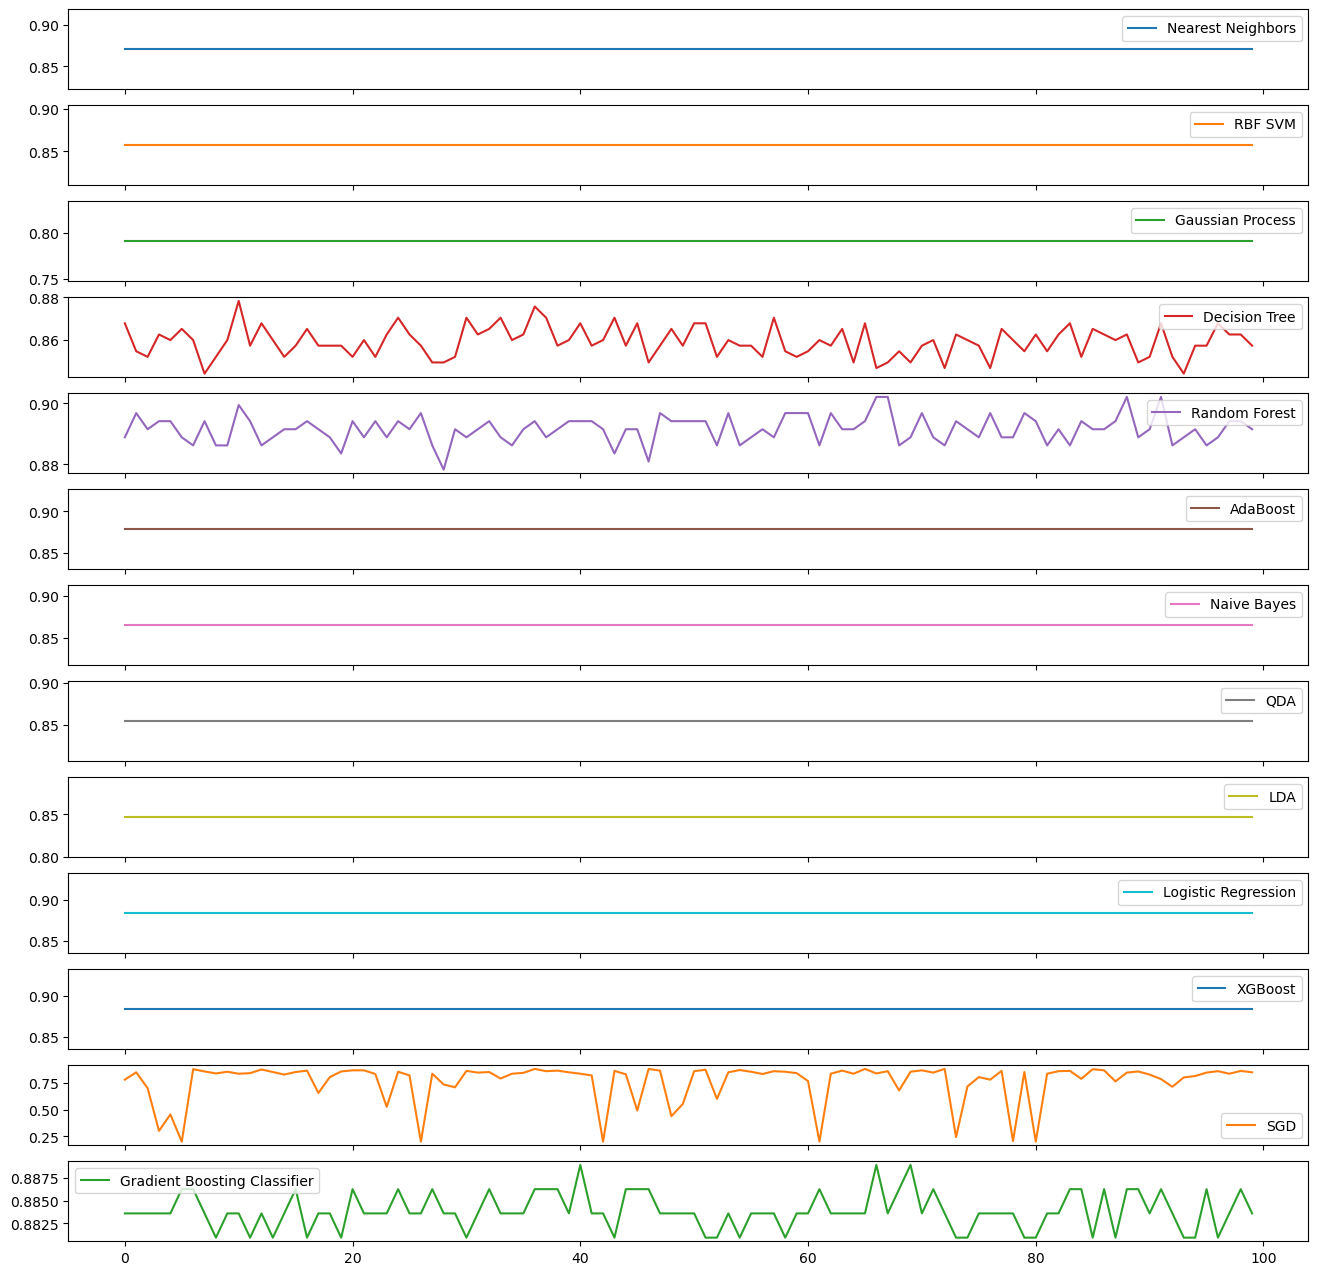

In [26]:
my_df = pd.DataFrame(data=results, columns=names)
my_df.plot(subplots=True, layout=(13,1), figsize=(16,16))

To compare classifier scores, we plot them to a single plot.

<AxesSubplot:>

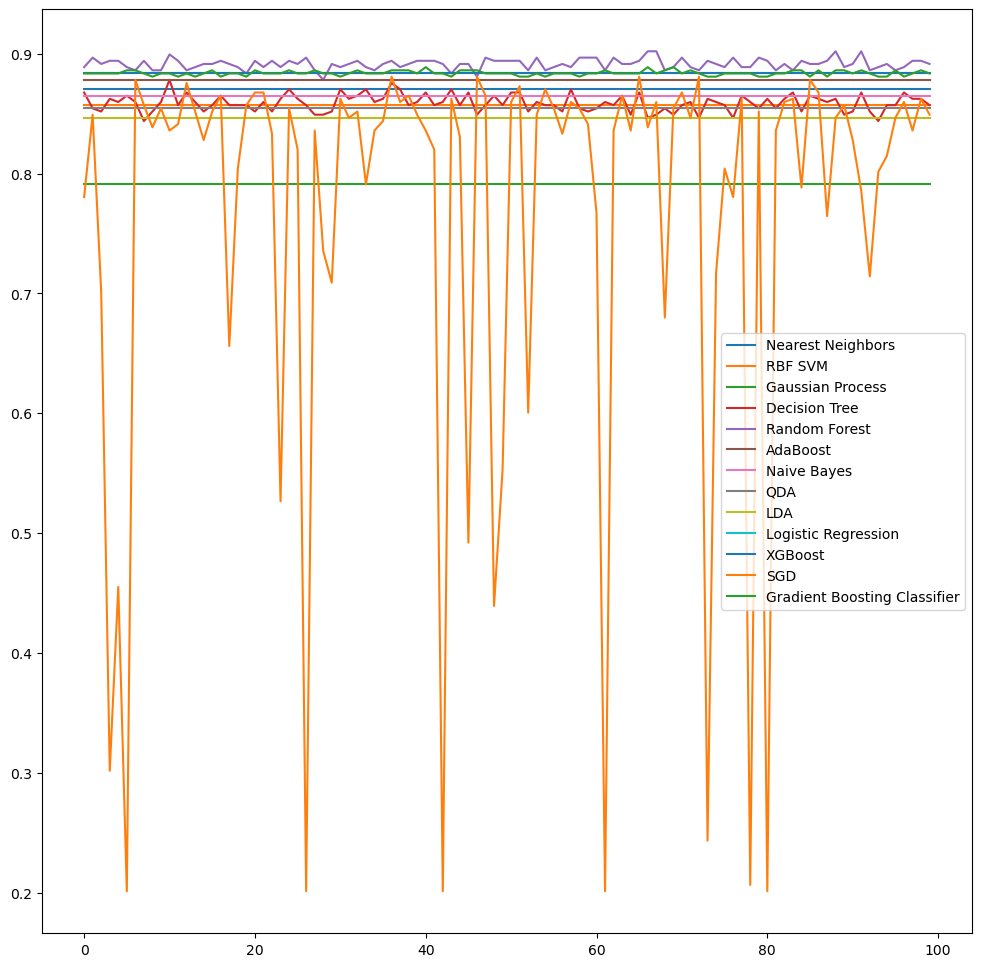

In [27]:
my_df.plot(figsize=(12,12))

<AxesSubplot:>

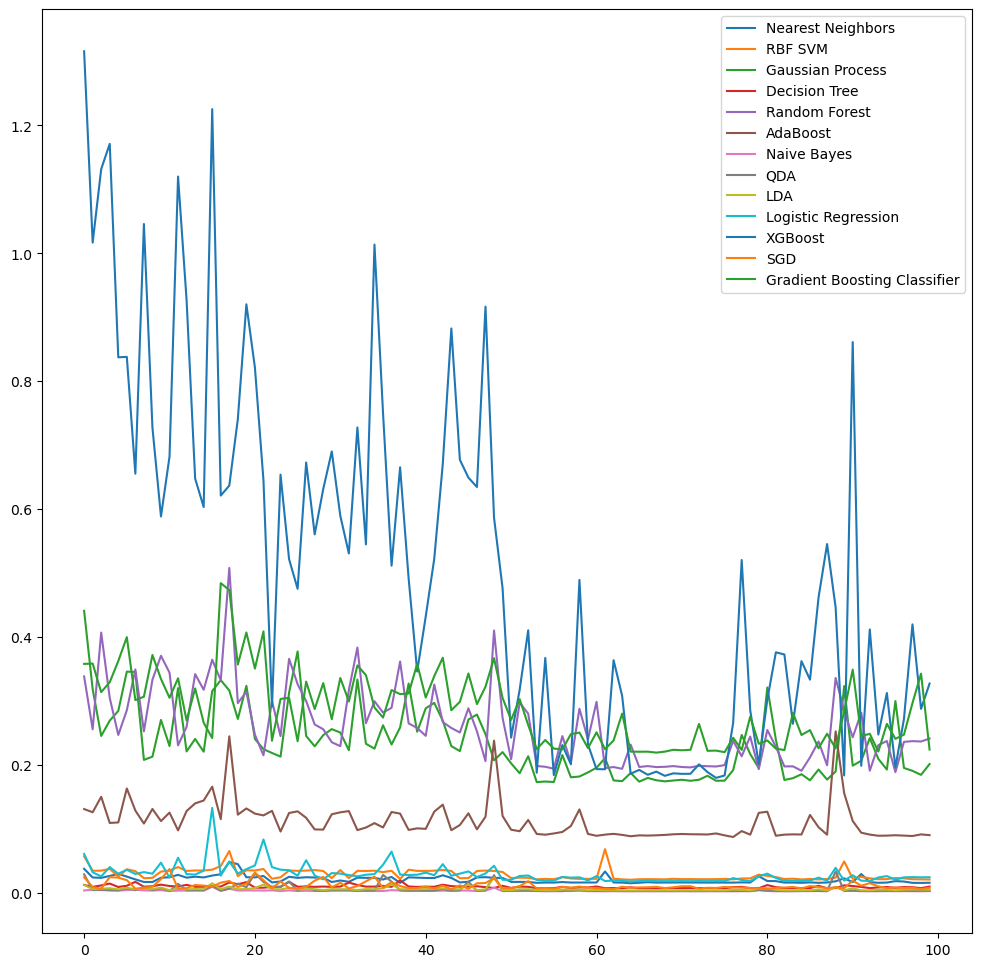

In [28]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df.plot(figsize=(12,12))

# How long one run took on average

In [29]:
time_mean_results = []
for key in names:
    mean = np.array(time_result[key]).mean()
    time_mean_results.append(mean)
    
timeMeanDf = pd.DataFrame(data=[time_mean_results], columns=names).T.sort_values(by=0, ascending=False)
timeMeanDf

,0
XGBoost,0.506659
Gradient Boosting Classifier,0.286584
Random Forest,0.261337
Gaussian Process,0.233392
AdaBoost,0.112311
Logistic Regression,0.029316
RBF SVM,0.028666
Nearest Neighbors,0.020751
SGD,0.011239
Decision Tree,0.009658


... median

In [30]:
time_median_results = []
for key in names:
    median = np.median(time_result[key])
    time_median_results.append(median)
    
timemedianDf = pd.DataFrame(data=[time_median_results], columns=names).T.sort_values(by=0, ascending=False)
timemedianDf

,0
XGBoost,0.475904
Gradient Boosting Classifier,0.277942
Random Forest,0.247091
Gaussian Process,0.220404
AdaBoost,0.101510
Logistic Regression,0.026254
RBF SVM,0.023745
Nearest Neighbors,0.017718
Decision Tree,0.009378
SGD,0.008705


# How long 100 iterations took per classifier

In [31]:
time_sum_results = []
for key in names:
    summed = np.array(time_result[key]).sum()
    time_sum_results.append(summed)
    
timeSumDf = pd.DataFrame(data=[time_sum_results], columns=names).T.sort_values(by=0, ascending=False)
timeSumDf

,0
XGBoost,50.665875
Gradient Boosting Classifier,28.658406
Random Forest,26.133672
Gaussian Process,23.339160
AdaBoost,11.231141
Logistic Regression,2.931614
RBF SVM,2.866579
Nearest Neighbors,2.075139
SGD,1.123900
Decision Tree,0.965838


# Average accuracy of each classifier based on 100 runs

In [32]:
mean_results = []
for key in names:
    mean = np.array(results[key]).mean()
    mean_results.append(mean)
    
meanDf = pd.DataFrame(data=[mean_results], columns=names).T.sort_values(by=0, ascending=False)
meanDf

,0
Random Forest,0.891561
Gradient Boosting Classifier,0.883862
Logistic Regression,0.883598
XGBoost,0.883598
AdaBoost,0.878307
Nearest Neighbors,0.870370
Naive Bayes,0.865079
Decision Tree,0.859021
RBF SVM,0.857143
QDA,0.854497


# Median accuracy of each classifier based on 100 runs

In [33]:
median_results = []
for key in names:
    median = np.median(results[key])
    median_results.append(median)
    
medianDf = pd.DataFrame(data=[median_results], columns=names).T.sort_values(by=0, ascending=False)
medianDf

,0
Random Forest,0.891534
Logistic Regression,0.883598
XGBoost,0.883598
Gradient Boosting Classifier,0.883598
AdaBoost,0.878307
Nearest Neighbors,0.870370
Naive Bayes,0.865079
Decision Tree,0.859788
RBF SVM,0.857143
QDA,0.854497


## Results

When looking only accuracies, it seems that the best performing classifier is Gradient Boosting Classifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html. But what about runtime?  
Next, we are going to rank classifers based on how they ranked in accuracy and runtime leaderboards. The higher the accuracy, the higher the rank. The lower the runtime, the higher the rank.

In [34]:
runtime_df = timeMeanDf.copy()
runtime_df['runtime_rank'] = list(reversed(range(1, len(runtime_df) + 1))) # here higher runtime is worse, so we reverse
runtime_df.rename( columns={0 :'runtime'}, inplace=True )
runtime_df.index.name = 'Classifier'

accuracy_df = meanDf.copy()
accuracy_df['accuracy_rank'] = range(1, len(accuracy_df) + 1)
accuracy_df.rename( columns={0 :'accuracy'}, inplace=True )
accuracy_df.index.name = 'Classifier'


df_merged = pd.merge(runtime_df, accuracy_df, how='inner', on = 'Classifier')
df_merged['total_rank'] = df_merged.apply(lambda row: row.runtime_rank + row.accuracy_rank, axis=1)
df_merged['total_rank'] = df_merged['total_rank'].astype('int')
df_merged = df_merged.sort_values(by=['total_rank'])
df_merged = df_merged.reset_index(level=0)
df_merged

,Classifier,runtime,runtime_rank,accuracy,accuracy_rank,total_rank
0,Naive Bayes,0.003319,1,0.865079,7,8
1,Logistic Regression,0.029316,8,0.883598,3,11
2,Random Forest,0.261337,11,0.891561,1,12
3,Nearest Neighbors,0.020751,6,0.870370,6,12
4,Decision Tree,0.009658,4,0.859021,8,12
5,QDA,0.005960,3,0.854497,10,13
6,LDA,0.005821,2,0.846561,11,13
7,Gradient Boosting Classifier,0.286584,12,0.883862,2,14
8,AdaBoost,0.112311,9,0.878307,5,14
9,RBF SVM,0.028666,7,0.857143,9,16


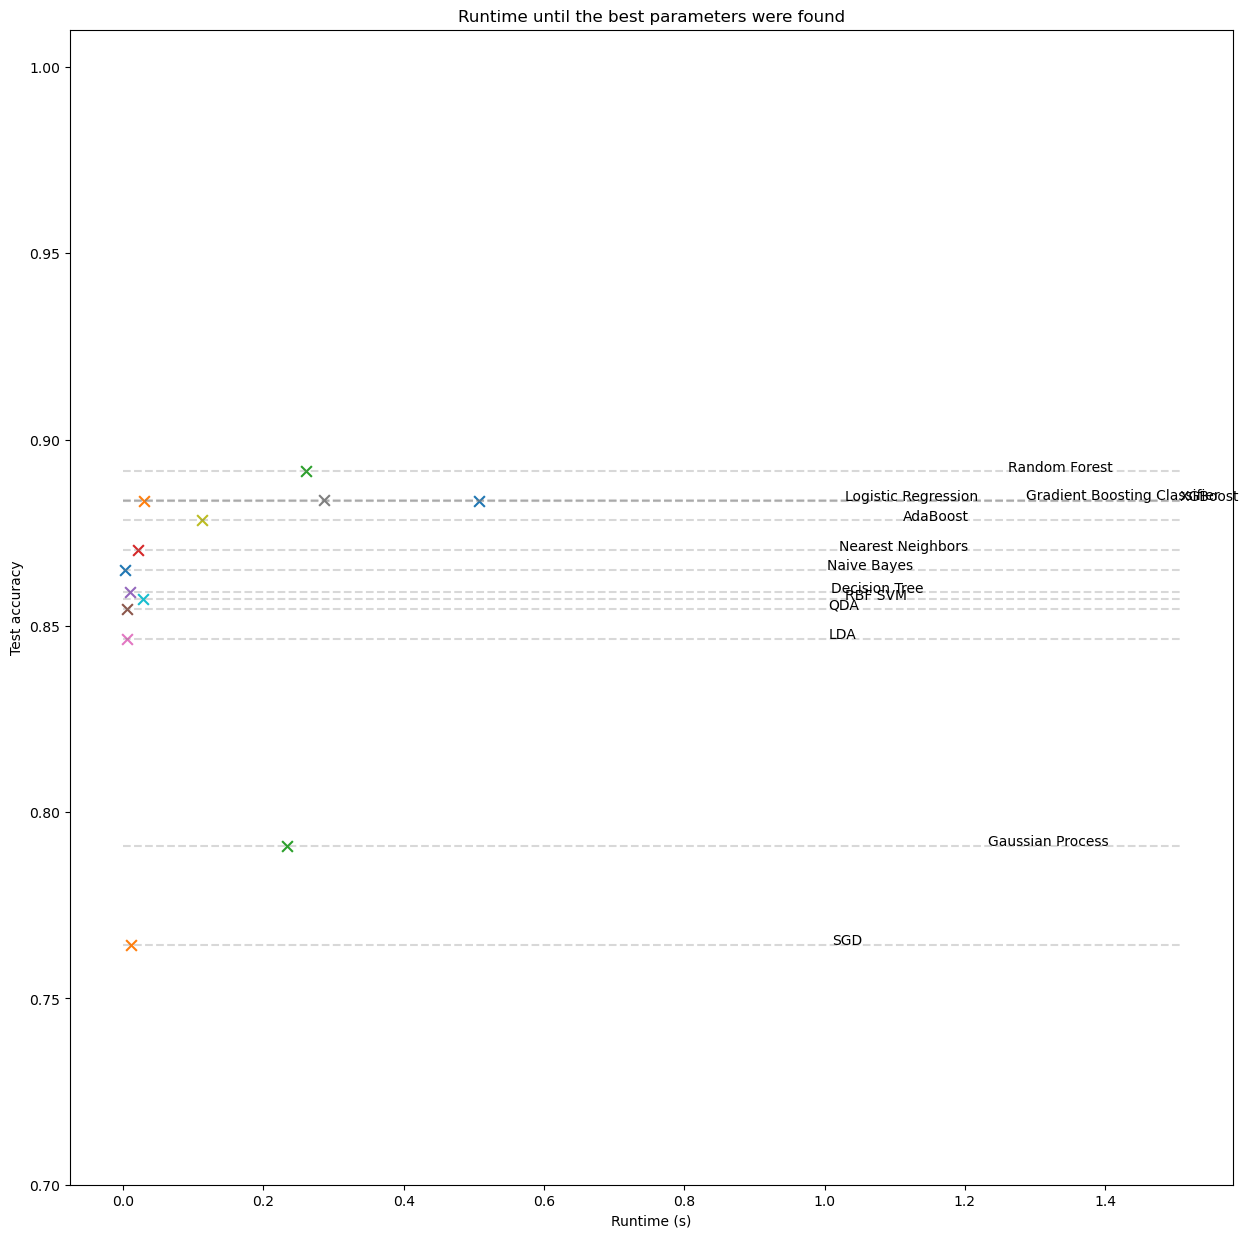

In [35]:
plt.figure(figsize = [15, 15])

for i in range(len(df_merged)):
    # Add classifier values
    plt.scatter(df_merged['runtime'][i], 
            df_merged['accuracy'][i], 
            label = df_merged['Classifier'][i],
               marker = 'x',
               s = 60)
    # Add a dashed lined marking the best accuracy threshold for classifier
    plt.hlines(y = df_merged['accuracy'][i], 
               xmin=0, 
               xmax = np.max(df_merged['runtime'])+1,
              linestyles = 'dashed', alpha = 0.3, color = 'grey')
    # Add classifier name
    plt.annotate(df_merged['Classifier'][i], 
                 (df_merged['runtime'][i]+1, 
                  df_merged['accuracy'][i]),
                )
plt.ylim(bottom = 0.70, top = 1.01)
plt.xlabel('Runtime (s)')
plt.ylabel('Test accuracy')
plt.title('Runtime until the best parameters were found')
plt.show();

So, even though Gradient Boosting Classifer achieved the accuracy of 0.918974, the LDA classifer performed only 1% worse (0.008 points), but achieved the result 37.6 times faster (0.221434/0.005883). 